In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Customer Churn.csv')

In [8]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

total charge have some blank values beacuse tenure is 0 ,so we replace blank values to 0 .

In [16]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


in sensior citizen we have 0 and 1 data values but we need yes or no . so we write a function for this

In [23]:
def convert(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(convert)

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


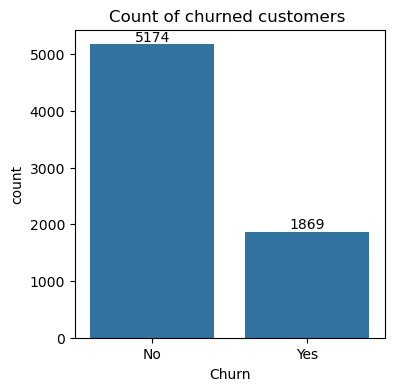

In [49]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Churn" , data = df)

ax.bar_label(ax.containers[0])

plt.title("Count of churned customers ")
plt.show()

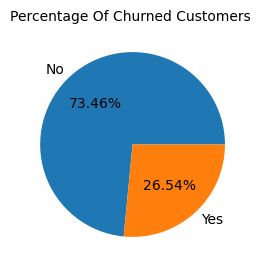

In [45]:
plt.figure(figsize=(3,3))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage Of Churned Customers ",fontsize=10)
plt.show()

In [57]:
#we see in this pie chart there are 26.54% of our customers have churned out 


In [59]:
#now we see the based on gender how many people chrned out 

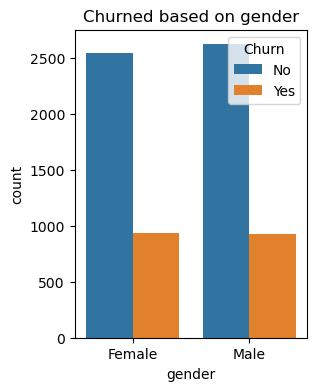

In [67]:
plt.figure(figsize=(3,4))
ge=sns.countplot(x='gender',data = df, hue = "Churn")
plt.title("Churned based on gender")
plt.show()

In [65]:
# as we see churned is not on the based on gender, but male and female both churned out equally 

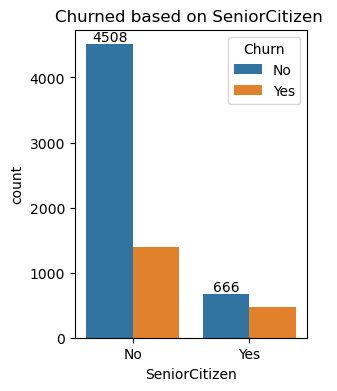

In [87]:
plt.figure(figsize=(3,4))
ax =sns.countplot(x='SeniorCitizen',data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned based on SeniorCitizen ")
plt.show()

In [89]:
# comparative a greater percentage of people in senior citizen category have churned out 

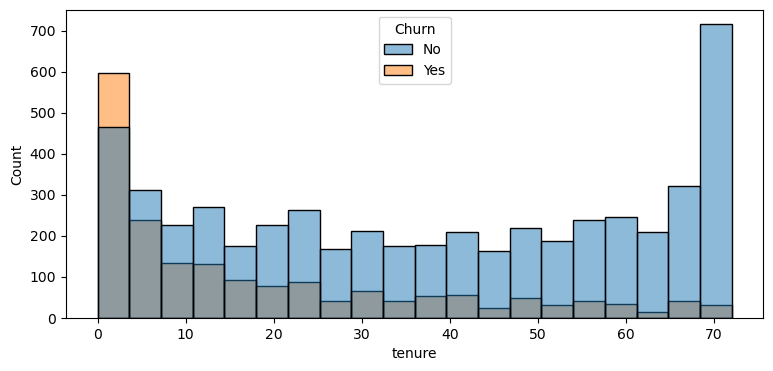

In [93]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data = df, bins = 20,hue = "Churn")
plt.show()

In [12]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

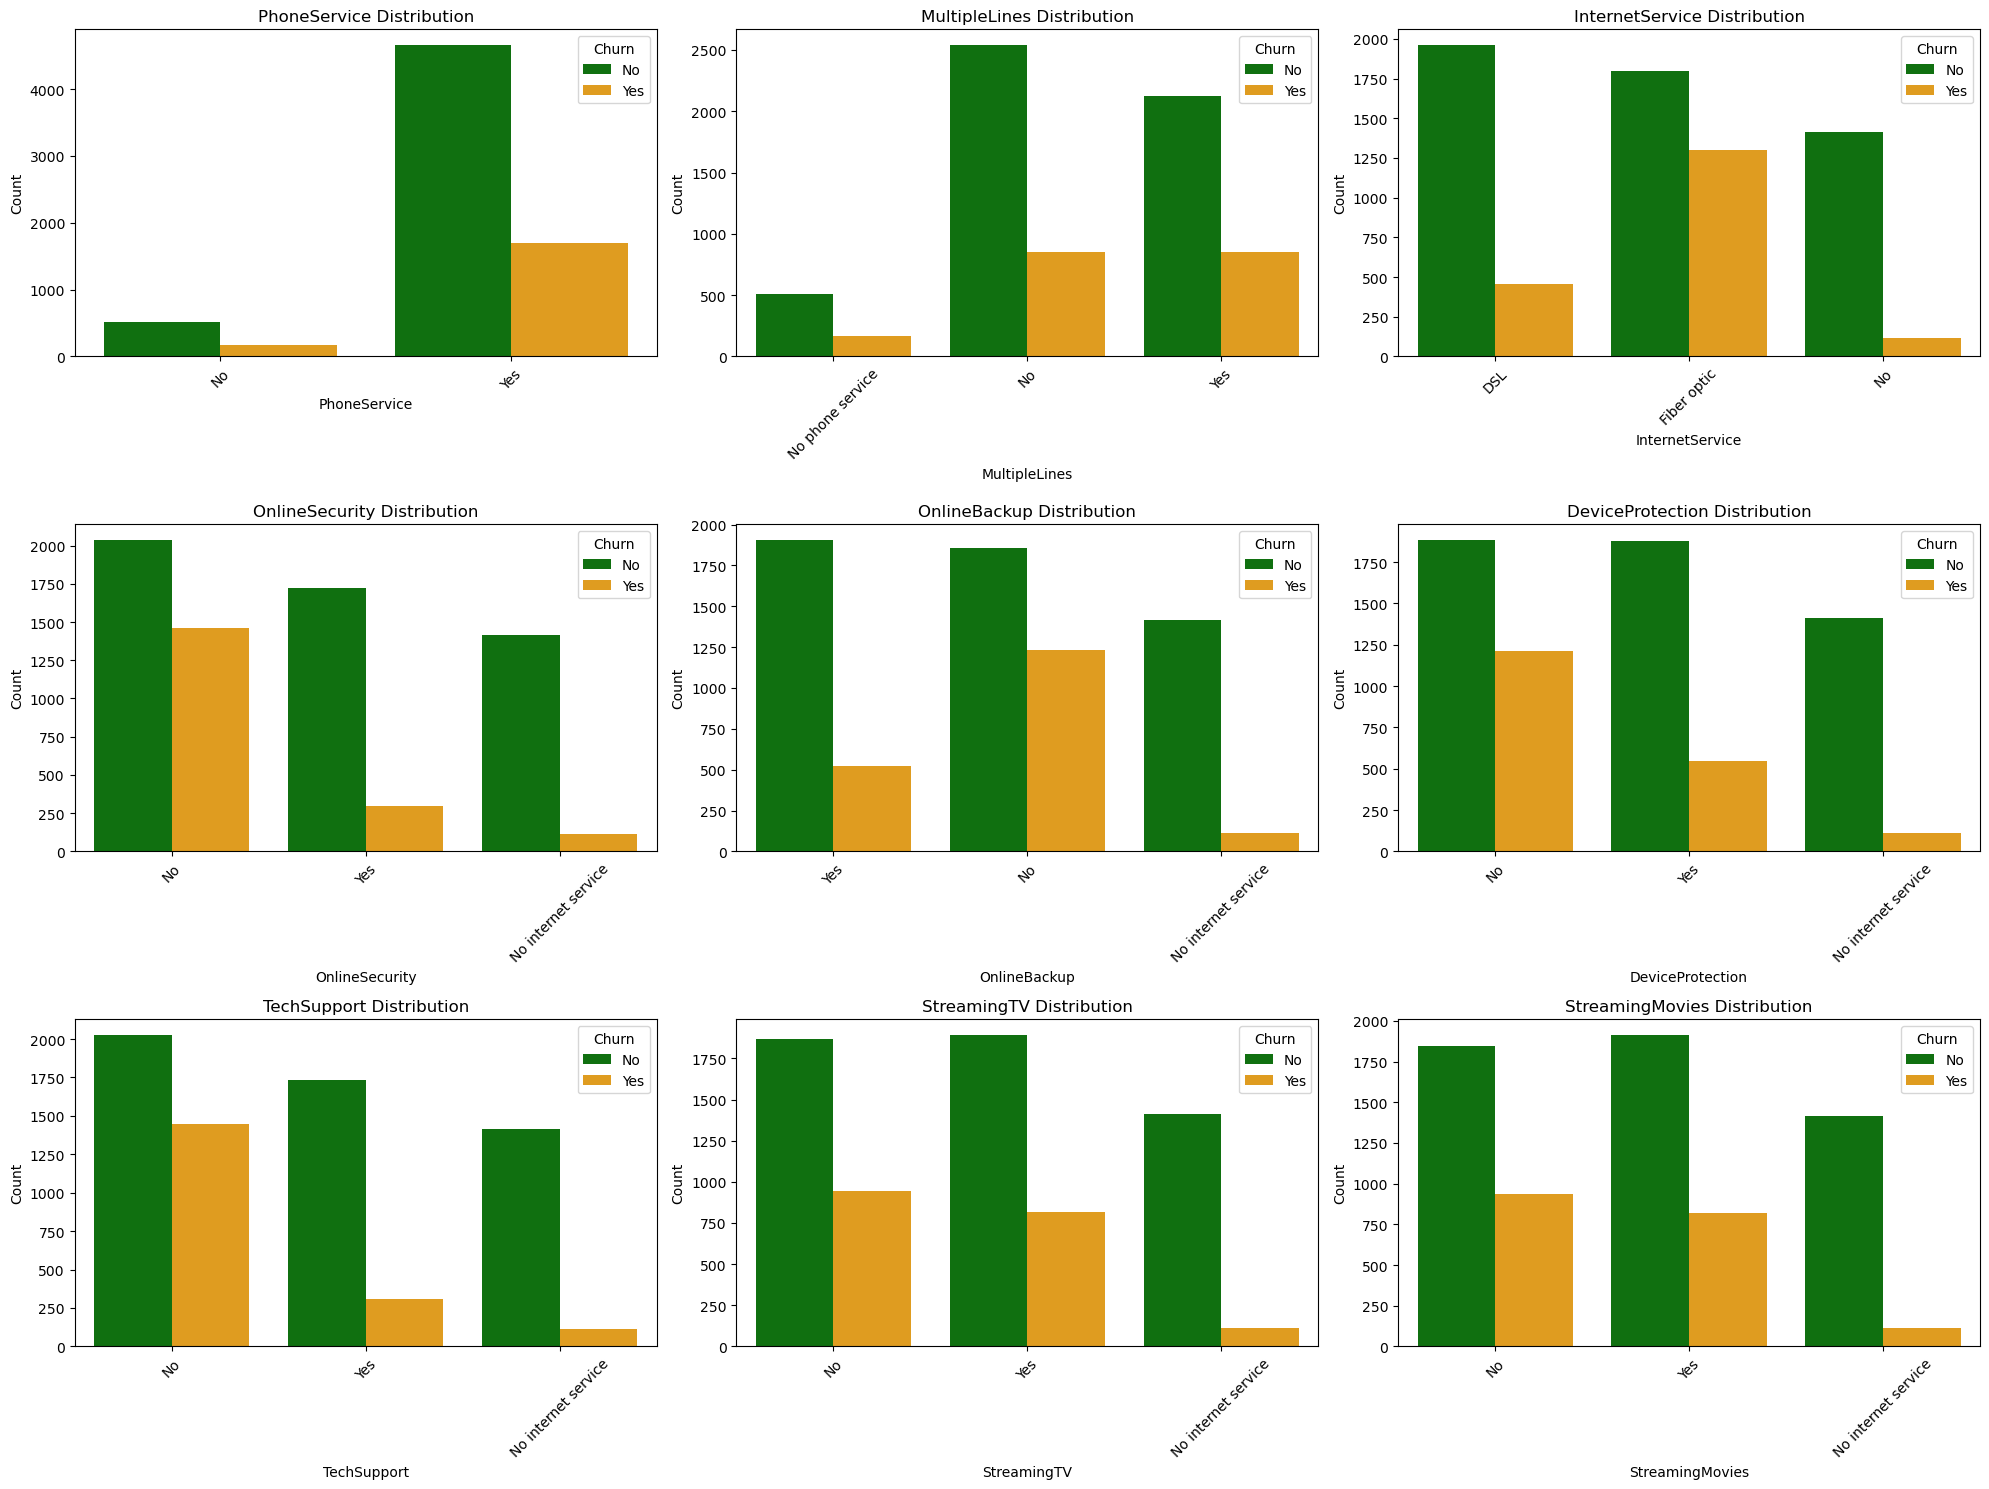

In [26]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']


plt.figure(figsize=(20, 15))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, hue='Churn', palette=['Green','orange'])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Customers with Fiber Optic, no security, or no support services tend to churn more . Offering better service support may reduce churn.

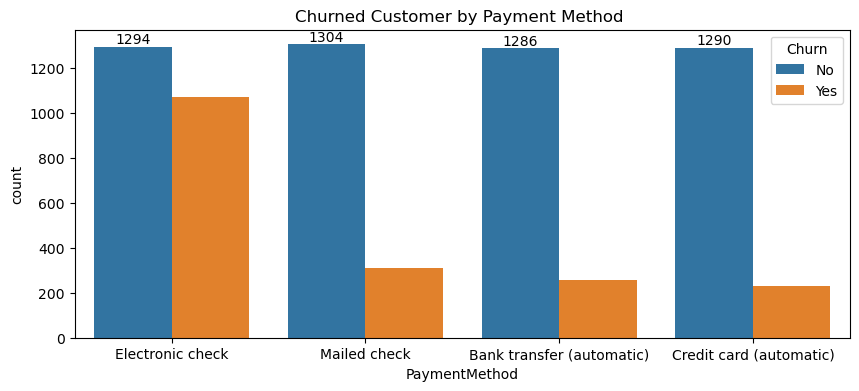

In [39]:
plt.figure(figsize=(10,4))
ge=sns.countplot(x='PaymentMethod',data = df, hue = "Churn")
ge.bar_label(ge.containers[0])
plt.title("Churned Customer by Payment Method ")
plt.show()

In [41]:
# Customer is likely to churn when he is using electronic check as a payment method .